<a href="https://colab.research.google.com/github/varungowda02/Customer-Segmentation/blob/main/Copy_of_Customer_Segmentation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/Data Science/Projects/P566 Customer Segmentation/marketing_campaign.xlsx', sheet_name='marketing_campaign')
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [4]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
df.shape

(2240, 29)

In [6]:
num_col = df.select_dtypes(include=['int64', 'float64']).columns
num_col

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')

In [7]:
cat_col = df.select_dtypes(include=['object']).columns
cat_col

Index(['Education', 'Marital_Status'], dtype='object')

In [8]:
df[['Education', 'Marital_Status']].nunique()

Education         5
Marital_Status    8
dtype: int64

In [9]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [10]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [11]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [12]:
df.describe(include="all").T

count unique         top  freq  \
ID                   2240.0    NaN         NaN   NaN   
Year_Birth           2240.0    NaN         NaN   NaN   
Education              2240      5  Graduation  1127   
Marital_Status         2240      8     Married   864   
Income               2216.0    NaN         NaN   NaN   
Kidhome              2240.0    NaN         NaN   NaN   
Teenhome             2240.0    NaN         NaN   NaN   
Dt_Customer            2240    NaN         NaN   NaN   
Recency              2240.0    NaN         NaN   NaN   
MntWines             2240.0    NaN         NaN   NaN   
MntFruits            2240.0    NaN         NaN   NaN   
MntMeatProducts      2240.0    NaN         NaN   NaN   
MntFishProducts      2240.0    NaN         NaN   NaN   
MntSweetProducts     2240.0    NaN         NaN   NaN   
MntGoldProds         2240.0    NaN         NaN   NaN   
NumDealsPurchases    2240.0    NaN         NaN   NaN   
NumWebPurchases      2240.0    NaN         NaN   NaN   
NumCatalogPurchases  2240.0    NaN         NaN   NaN   
NumStorePurchases    2240.0    NaN         NaN   NaN   
NumWebVisitsMonth    2240.0    NaN         NaN   NaN   
AcceptedCmp3         2240.0    NaN         NaN   NaN   
AcceptedCmp4         2240.0    NaN         NaN   NaN   
AcceptedCmp5         2240.0    NaN         NaN   NaN   
AcceptedCmp1         2240.0    NaN         NaN   NaN   
AcceptedCmp2         2240.0    NaN         NaN   NaN   
Complain             2240.0    NaN         NaN   NaN   
Z_CostContact        2240.0    NaN         NaN   NaN   
Z_Revenue            2240.0    NaN         NaN   NaN   
Response             2240.0    NaN         NaN   NaN   

                                              mean                  min  \
ID                                     5592.159821                  0.0   
Year_Birth                             1968.805804               1893.0   
Education                                      NaN                  NaN   
Marital_Status                                 NaN                  NaN   
Income                                52247.251354               1730.0   
Kidhome                                   0.444196                  0.0   
Teenhome                                   0.50625                  0.0   
Dt_Customer          2013-07-10 10:01:42.857142784  2012-07-30 00:00:00   
Recency                                  49.109375                  0.0   
MntWines                                303.935714                  0.0   
MntFruits                                26.302232                  0.0   
MntMeatProducts                             166.95                  0.0   
MntFishProducts                          37.525446                  0.0   
MntSweetProducts                         27.062946                  0.0   
MntGoldProds                             44.021875                  0.0   
NumDealsPurchases                            2.325                  0.0   
NumWebPurchases                           4.084821                  0.0   
NumCatalogPurchases                       2.662054                  0.0   
NumStorePurchases                         5.790179                  0.0   
NumWebVisitsMonth                         5.316518                  0.0   
AcceptedCmp3                              0.072768                  0.0   
AcceptedCmp4                              0.074554                  0.0   
AcceptedCmp5                              0.072768                  0.0   
AcceptedCmp1                              0.064286                  0.0   
AcceptedCmp2                              0.013393                  0.0   
Complain                                  0.009375                  0.0   
Z_CostContact                                  3.0                  3.0   
Z_Revenue                                     11.0                 11.0   
Response                                  0.149107                  0.0   

                                     25%                  50%  \
ID                       

In [13]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [14]:
df['Income'].fillna(df['Income'].median(), inplace=True)

/tmp/ipython-input-1959487941.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace=True)


In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

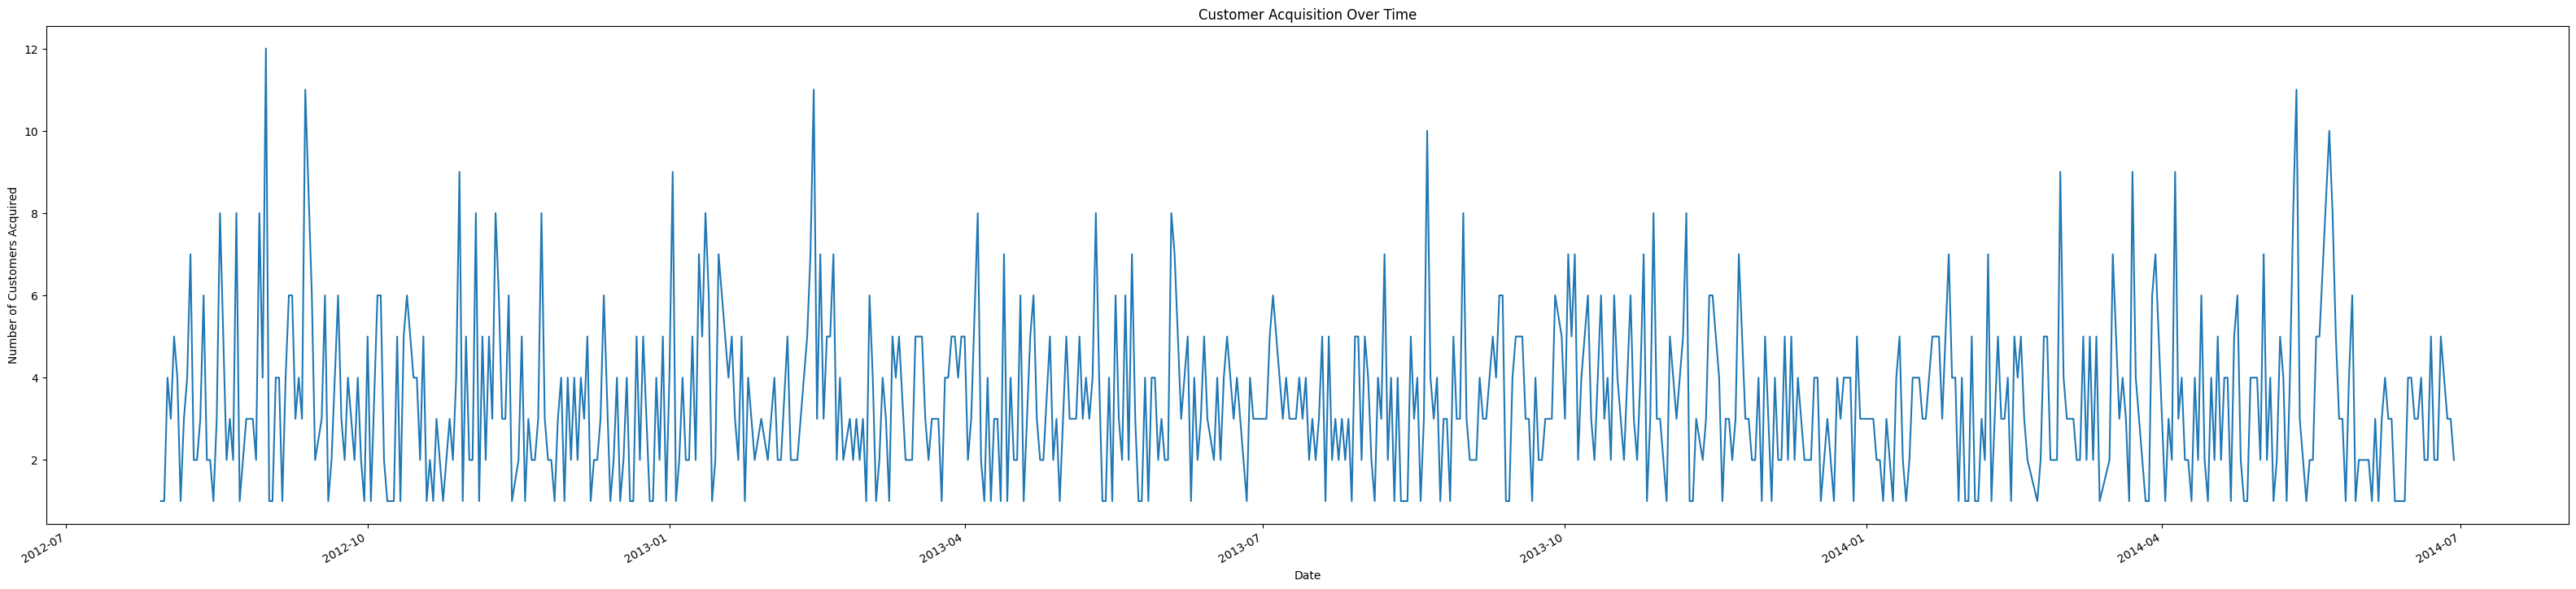

In [17]:
# Plotting the count of customers over time
df['Dt_Customer'].value_counts().sort_index().plot(kind='line', figsize=(40, 9))
plt.title('Customer Acquisition Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Customers Acquired')
plt.show()

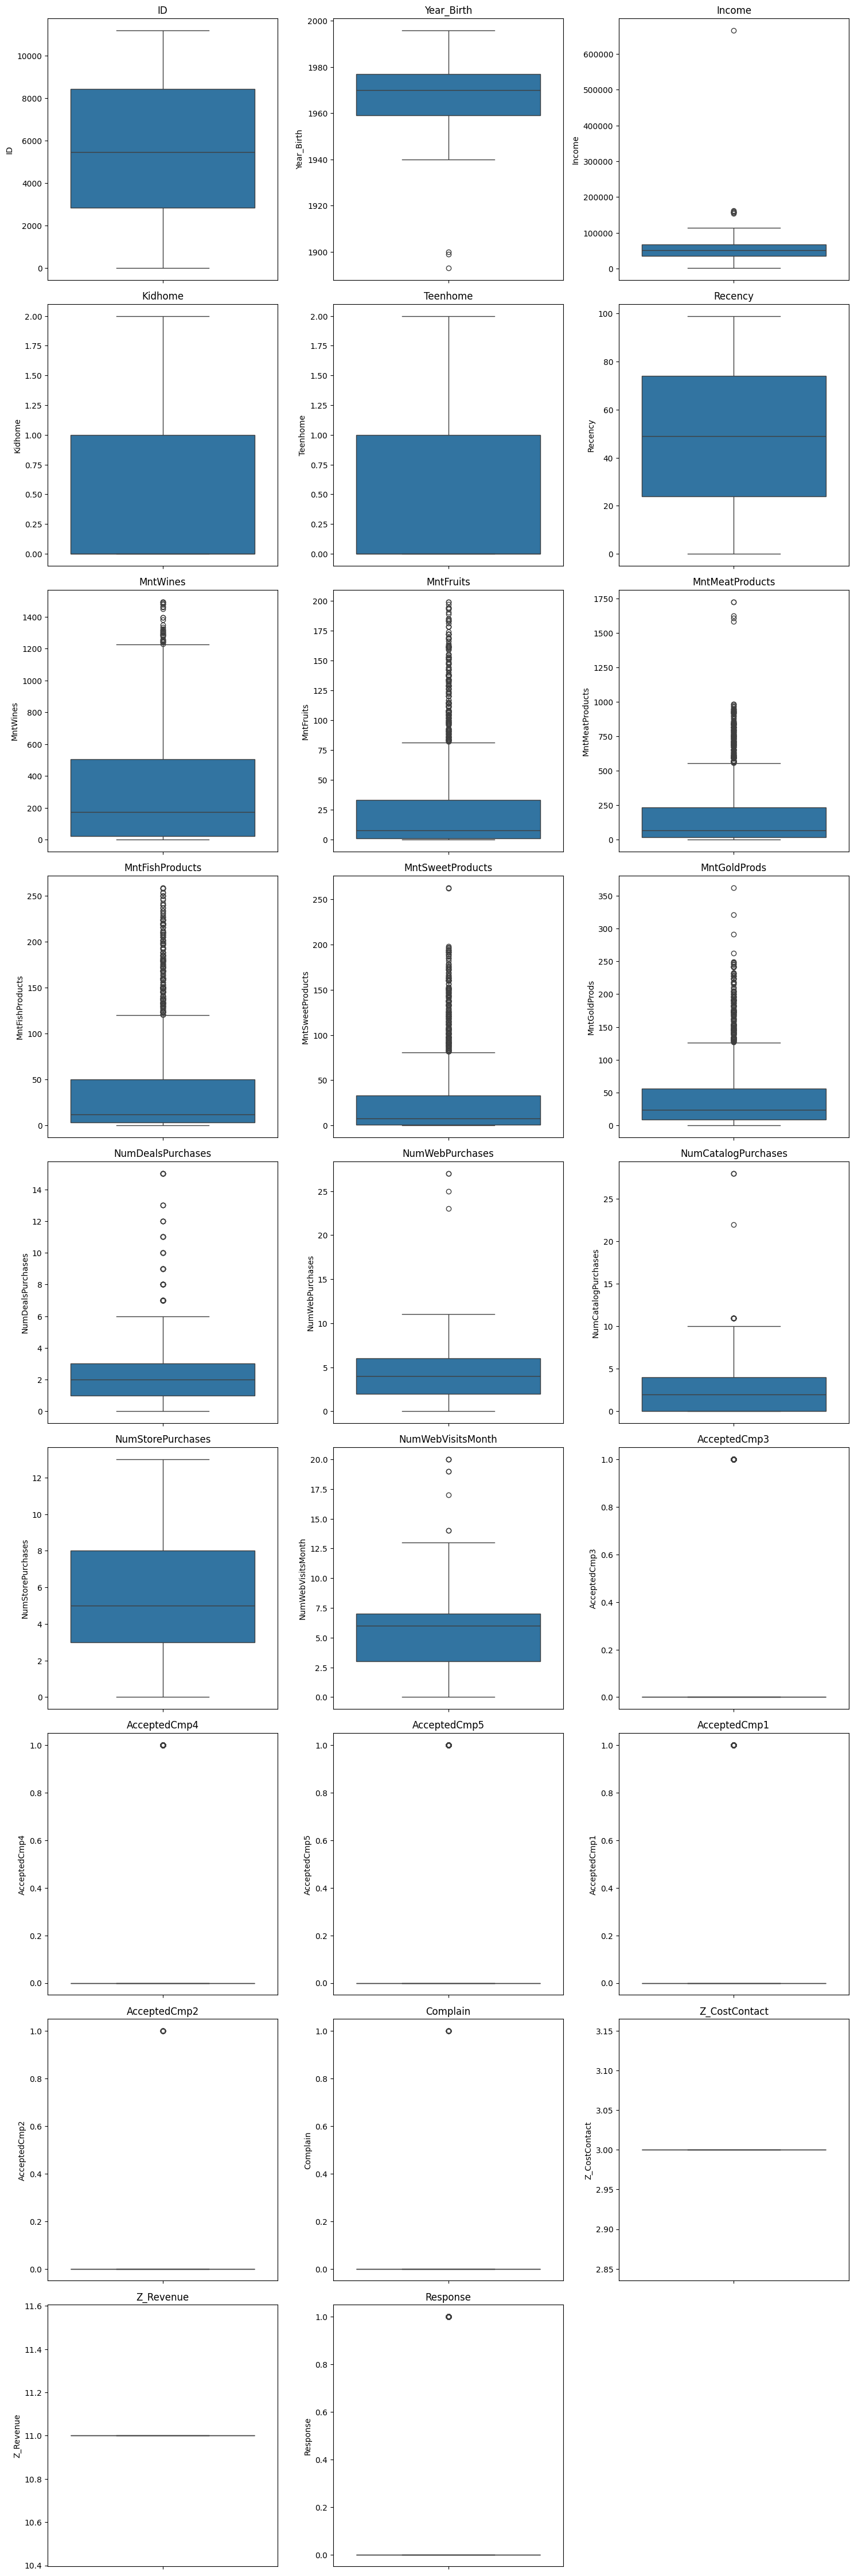

In [18]:
# Create a figure and axes for the subplots
num_cols = df.select_dtypes(include=np.number).columns
n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols  # Calculate number of rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten() # Flatten the axes array for easy iteration

# Create box plots for each numerical column
for i, col in enumerate(num_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

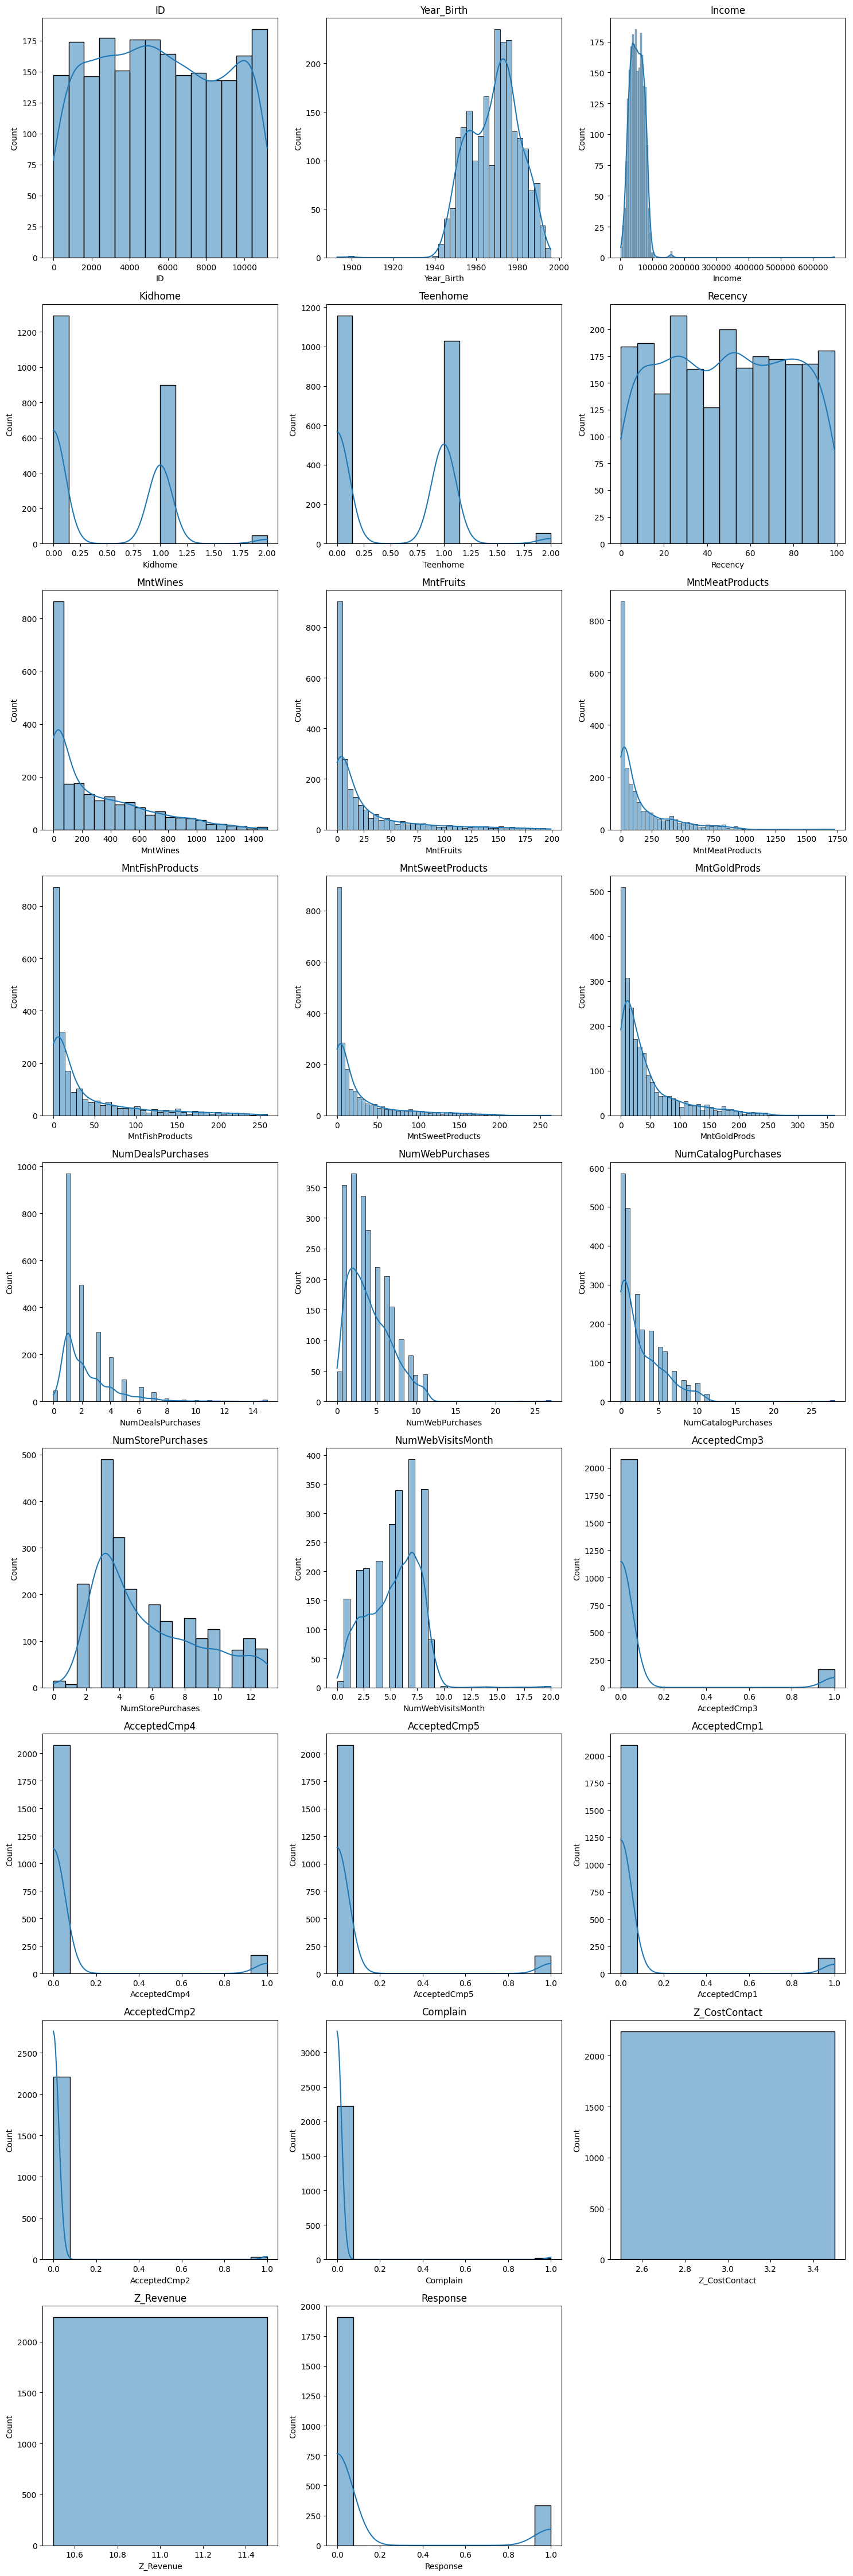

In [19]:
# Create a figure and axes for the subplots
num_cols = df.select_dtypes(include=np.number).columns
n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols  # Calculate number of rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten() # Flatten the axes array for easy iteration

# Create histograms with KDE for each numerical column
for i, col in enumerate(num_cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [20]:
df.shape

(2240, 29)

In [21]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(random_state=42, contamination=0.05)
outliers = iso.fit_predict(df[num_col])

In [22]:
df[outliers == -1]

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
21     5376        1979  Graduation        Married   2447.0        1   
27     5255        1986  Graduation         Single  51381.5        1   
53     2225        1977  Graduation       Divorced  82582.0        0   
67     9369        1979    2n Cycle         Single  88194.0        0   
116    1592        1970  Graduation        Married  90765.0        0   
...     ...         ...         ...            ...      ...      ...   
2125   2088        1972  Graduation       Together  84906.0        0   
2167   3520        1990      Master         Single  91172.0        0   
2168  10394        1984  Graduation        Married  90000.0        0   
2171   3968        1970    2n Cycle       Divorced  65706.0        0   
2193   8722        1957    2n Cycle        Married  82347.0        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
21           0  2013-01-06       42         1  ...                  1   
27           0  2013-02-20       19         5  ...                  1   
53           0  2014-06-07       54       510  ...                  1   
67           1  2014-03-19       19       688  ...                  5   
116          0  2014-01-24       25       547  ...                  1   
...        ...         ...      ...       ...  ...                ...   
2125         0  2013-10-04       98       997  ...                  2   
2167         0  2013-03-27       94       162  ...                  3   
2168         0  2013-12-23       91       675  ...                  1   
2171         0  2013-06-28       77       918  ...                  7   
2193         0  2012-11-06       38       556  ...                  3   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
21               0             0             0             0             0   
27               0             0             0             0             0   
53               1             0             0             1             0   
67               1             0             0             1             0   
116              0             0             1             1             0   
...            ...           ...           ...           ...           ...   
2125             0             1             1             0             1   
2167             1             0             1             1             1   
2168             1             0             1             1             0   
2171             0             1             1             0             1   
2193             1             0             0             1             0   

      Complain  Z_CostContact  Z_Revenue  Response  
21           0              3         11         0  
27           0              3         11         0  
53           0              3         11         1  
67           0              3         11         1  
116          0              3         11         0  
...        ...            ...        ...       ...  
2125         0              3         11         0  
2167         0              3         11         1  
2168         0              3         11         0  
2171         0              3         11         1  
2193         0              3         11         1  

[112 rows x 29 columns]

In [23]:
df = df[outliers == 1]

In [24]:
q1 = df['Income'].quantile(0.25)
q3 = df['Income'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df['Income'] >= lower_bound) & (df['Income'] <= upper_bound)]

In [25]:
df.shape

(2123, 29)

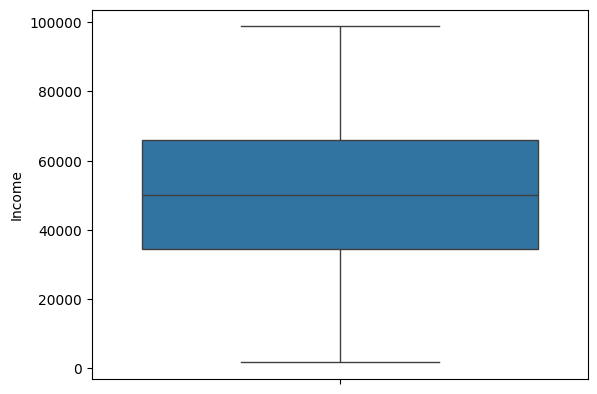

In [26]:
sns.boxplot(df['Income'])
plt.show()

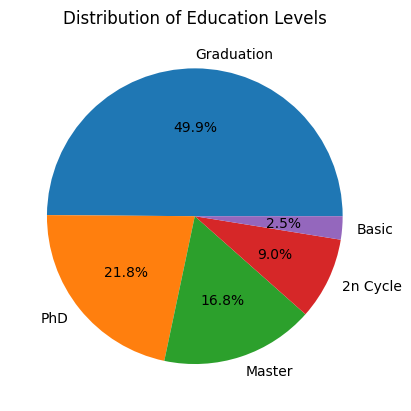

In [27]:
plt.pie(df['Education'].value_counts(), labels=df['Education'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Education Levels')
plt.show()

<Axes: xlabel='Marital_Status', ylabel='count'>

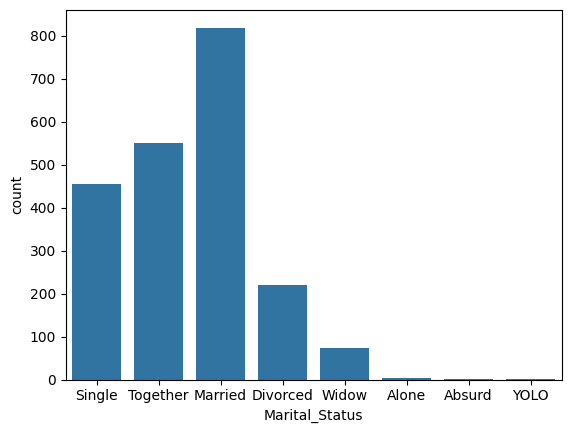

In [28]:
sns.countplot(data=df, x='Marital_Status')

<Axes: xlabel='Education'>

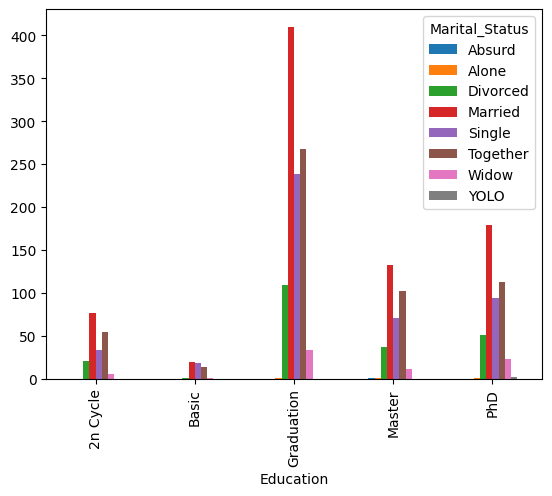

In [29]:
pd.crosstab(df['Education'], df['Marital_Status']).plot(kind='bar')

In [30]:
# from datetime import datetime
# df['Age'] = datetime.now().year - df['Year_Birth']

In [31]:
# def assign_age_group(age):
#     if 18 <= age <= 30:
#         return '18-30'
#     elif 31 <= age <= 45:
#         return '31-45'
#     elif 46 <= age <= 60:
#         return '46-60'
#     elif age > 60:
#         return '61+'
#     else:
#         return None  # in case age is below 18 or missing

# df['Age_Group'] = df['Age'].apply(assign_age_group)

In [32]:
# Calculate total spending by summing relevant columns
df['Total_Spend'] = df.loc[:, ['MntWines', 'MntFruits', 'MntMeatProducts',
                               'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

In [33]:
# Calculate total campaign Accepted by summing all Accepted-related columns
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
df['Campaign_Accepted_Total'] = df[campaign_columns].sum(axis=1)

In [34]:
# Calculate engagement score based on customer interaction channels
df['Engagement_Score'] = df.loc[:, ['NumWebVisitsMonth', 'NumCatalogPurchases',
                                    'NumStorePurchases', 'NumWebPurchases']].sum(axis=1)

In [35]:
# Creating "Is_Parent" to indicate parenthood status
df['Is_Parent'] = (df['Kidhome'] + df['Teenhome'] > 0).astype(int)

In [36]:
# create new feature for average monthly visits to the company's website
df['avg_web_visits'] = df['NumWebVisitsMonth'] / 12

In [37]:
# createing a new feature for the ratio of online purchases to total purchases
df['online_purchase_ratio'] = df['NumWebPurchases'] / (df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'])

In [38]:
df.loc[:, ['Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID']]

Dt_Customer  Z_CostContact  Z_Revenue  Year_Birth     ID
0     2012-09-04              3         11        1957   5524
1     2014-03-08              3         11        1954   2174
2     2013-08-21              3         11        1965   4141
3     2014-02-10              3         11        1984   6182
4     2014-01-19              3         11        1981   5324
...          ...            ...        ...         ...    ...
2235  2013-06-13              3         11        1967  10870
2236  2014-06-10              3         11        1946   4001
2237  2014-01-25              3         11        1981   7270
2238  2014-01-24              3         11        1956   8235
2239  2012-10-15              3         11        1954   9405

[2123 rows x 5 columns]

In [39]:
# df[['Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID']].nunique()
df[['Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'ID']].nunique()

Dt_Customer       659
Z_CostContact       1
Z_Revenue           1
ID               2123
dtype: int64

In [40]:
# Drop specified columns
# df = df.drop(columns=['Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID'], axis = 1)
df = df.drop(columns=['Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'ID'], axis = 1)
df

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation       Together  71613.0        0         0   
3           1984  Graduation       Together  26646.0        1         0   
4           1981         PhD        Married  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2235        1967  Graduation        Married  61223.0        0         1   
2236        1946         PhD       Together  64014.0        2         1   
2237        1981  Graduation       Divorced  56981.0        0         0   
2238        1956      Master       Together  69245.0        0         1   
2239        1954         PhD        Married  52869.0        1         1   

      Recency  MntWines  MntFruits  MntMeatProducts  ...  AcceptedCmp1  \
0          58       635         88              546  ...             0   
1          38        11          1                6  ...             0   
2          26       426         49              127  ...             0   
3          26        11          4               20  ...             0   
4          94       173         43              118  ...             0   
...       ...       ...        ...              ...  ...           ...   
2235       46       709         43              182  ...             0   
2236       56       406          0               30  ...             1   
2237       91       908         48              217  ...             0   
2238        8       428         30              214  ...             0   
2239       40        84          3               61  ...             0   

      AcceptedCmp2  Complain  Response  Total_Spend  Campaign_Accepted_Total  \
0                0         0         1         1617                        0   
1                0         0         0           27                        0   
2                0         0         0          776                        0   
3                0         0         0           53                        0   
4                0         0         0          422                        0   
...            ...       ...       ...          ...                      ...   
2235             0         0         0         1341                        0   
2236             0         0         0          444                        1   
2237             0         0         0         1241                        1   
2238             0         0         0          843                        0   
2239             0         0         1          172                        0   

      Engagement_Score  Is_Parent  avg_web_visits  online_purchase_ratio  
0                   29          0        0.583333               0.363636  
1                    9          1        0.416667               0.250000  
2                   24          0        0.333333               0.400000  
3                   12          1        0.500000               0.333333  
4                   19          1        0.416667               0.357143  
...                ...        ...             ...                    ...  
2235                21          1        0.416667               0.562500  
2236                22          1        0.583333               0.533333  
2237                24          0        0.500000               0.111111  
2238                24          1        0.250000               0.285714  
2239                15          1        0.583333               0.375000  

[2123 rows x 31 columns]

In [41]:
# sns.histplot(df['Age'], bins = 20, kde = True)
# plt.title('Distribution of Age')
# plt.xlabel('Age')

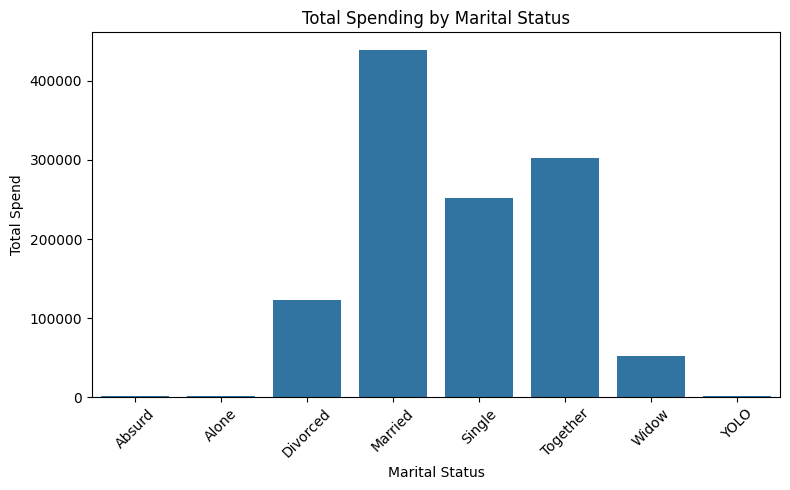

In [42]:
df_plot = df.groupby('Marital_Status')['Total_Spend'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=df_plot, x='Marital_Status', y='Total_Spend')
plt.title('Total Spending by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Total Spend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

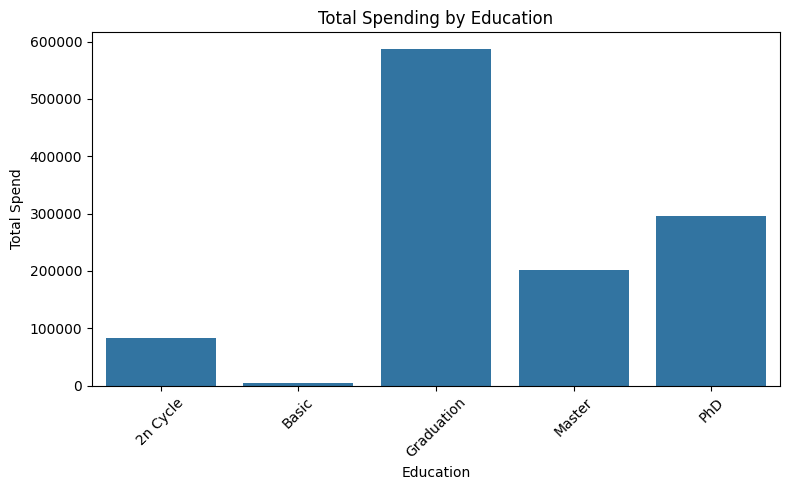

In [43]:
df_plot = df.groupby('Education')['Total_Spend'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=df_plot, x='Education', y='Total_Spend')
plt.title('Total Spending by Education')
plt.xlabel('Education')
plt.ylabel('Total Spend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

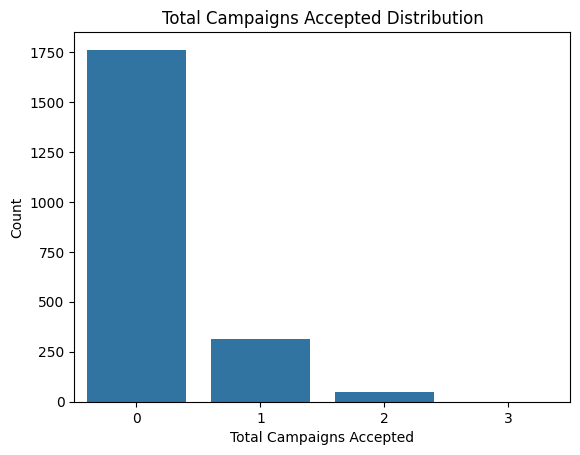

In [44]:
# Total Campaigns Accepted Distribution
sns.countplot(data=df, x='Campaign_Accepted_Total')
plt.title('Total Campaigns Accepted Distribution')
plt.xlabel('Total Campaigns Accepted')
plt.ylabel('Count')
plt.show()

Text(0.5, 0, 'online_purchase_ratio')

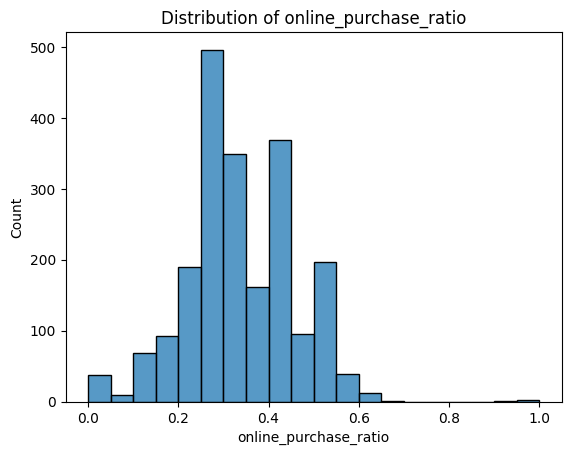

In [45]:
sns.histplot(df['online_purchase_ratio'], bins = 20)
plt.title('Distribution of online_purchase_ratio')
plt.xlabel('online_purchase_ratio')

Text(0.5, 0, 'Engagement_Score')

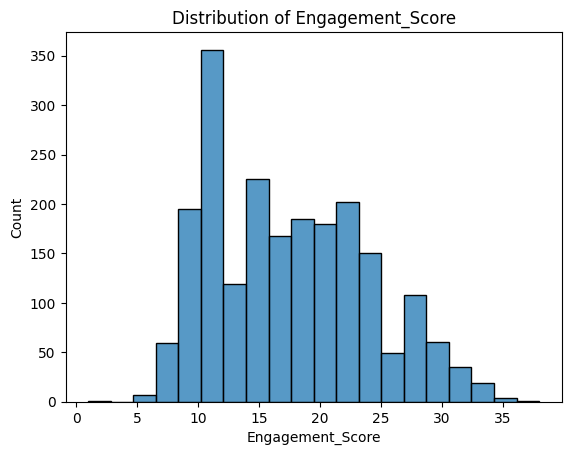

In [46]:
sns.histplot(df['Engagement_Score'], bins = 20)
plt.title('Distribution of Engagement_Score')
plt.xlabel('Engagement_Score')

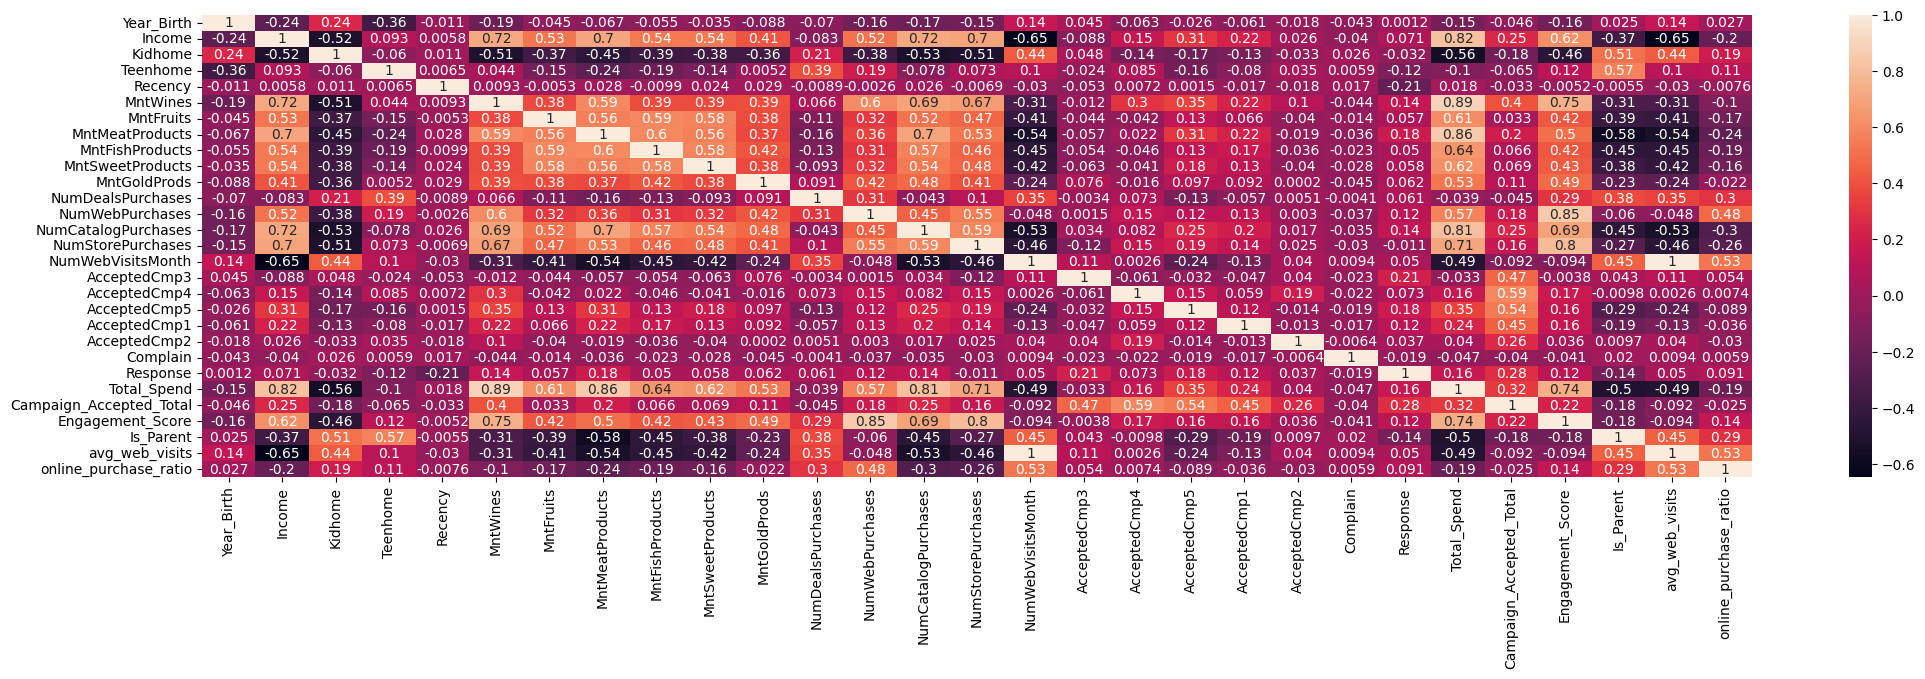

In [47]:
z = df.corr(numeric_only=True)
plt.figure(figsize=(25, 6))
sns.heatmap(z, annot=True)
plt.show()

In [48]:
# # Select only numeric columns
# numeric_df = df.select_dtypes(include=np.number)
# # Create pairplot
# sns.pairplot(numeric_df)
# plt.show()

In [49]:
df['online_purchase_ratio'].fillna(df['online_purchase_ratio'].median(), inplace=True)

/tmp/ipython-input-229208213.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['online_purchase_ratio'].fillna(df['online_purchase_ratio'].median(), inplace=True)


In [50]:
df2 = df.copy()

In [51]:
# df=pd.get_dummies(df, columns=['Education', 'Marital_Status', 'Age_Group'])
df=pd.get_dummies(df, columns=['Education', 'Marital_Status'])

In [52]:
for i in df.select_dtypes(include=['bool']).columns:
    df[i] = df[i].astype(int)

In [53]:
df.columns

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Total_Spend',
       'Campaign_Accepted_Total', 'Engagement_Score', 'Is_Parent',
       'avg_web_visits', 'online_purchase_ratio', 'Education_2n Cycle',
       'Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Marital_Status_Absurd', 'Marital_Status_Alone',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Marital_Status_YOLO'],
      dtype='object')

In [54]:
num_col = ['Income', 'Year_Birth','Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Total_Spend',
       'Campaign_Accepted_Total', 'Engagement_Score', 'Is_Parent',
       'avg_web_visits', 'online_purchase_ratio']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# num_col = df.select_dtypes(include=['int64', 'float64']).columns
df[num_col] = scaler.fit_transform(df[num_col])

In [55]:
df.head()

Year_Birth    Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0   -0.981582  0.403836 -0.849810 -0.959525  0.308375  1.153446   1.693315   
1   -1.233880 -0.194398  0.998701  0.882312 -0.384519 -0.859705  -0.620233   
2   -0.308787  1.087336 -0.849810 -0.959525 -0.800255  0.479170   0.656207   
3    1.289101 -1.193551  0.998701 -0.959525 -0.800255 -0.859705  -0.540455   
4    1.036803  0.411698  0.998701 -0.959525  1.555584 -0.337060   0.496652   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  Education_Master  \
0         1.949591         2.629722          1.657950  ...                 0   
1        -0.708765        -0.628474         -0.619798  ...                 0   
2        -0.113096         1.460604         -0.096178  ...                 0   
3        -0.639845        -0.475147         -0.567436  ...                 0   
4        -0.157402         0.214824          0.060908  ...                 0   

   Education_PhD  Marital_Status_Absurd  Marital_Status_Alone  \
0              0                      0                     0   
1              0                      0                     0   
2              0                      0                     0   
3              0                      0                     0   
4              1                      0                     0   

   Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  \
0                        0                       0                      1   
1                        0                       0                      1   
2                        0                       0                      0   
3                        0                       0                      0   
4                        0                       1                      0   

   Marital_Status_Together  Marital_Status_Widow  Marital_Status_YOLO  
0                        0                     0                    0  
1                        0                     0                    0  
2                        1                     0                    0  
3                        1                     0                    0  
4                        0                     0                    0  

[5 rows x 42 columns]

In [56]:
# values = df.copy()

In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
values = pca.fit_transform(df)
values

array([[ 4.82258577,  1.10133434],
       [-2.58067184, -1.1614938 ],
       [ 2.52204945, -0.20203844],
       ...,
       [ 2.78711075, -0.07922709],
       [ 2.49255202,  0.42344948],
       [-2.00699346,  0.96764081]])

In [58]:
# from sklearn.manifold import TSNE
# tsne = TSNE(n_components=2, perplexity=50.0)
# values = tsne.fit_transform(df)
# values

In [59]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
score = []
wcss = []
for i in range(2, 17):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(values)
    wcss.append(kmeans.inertia_)
    score.append(silhouette_score(values, kmeans.labels_))

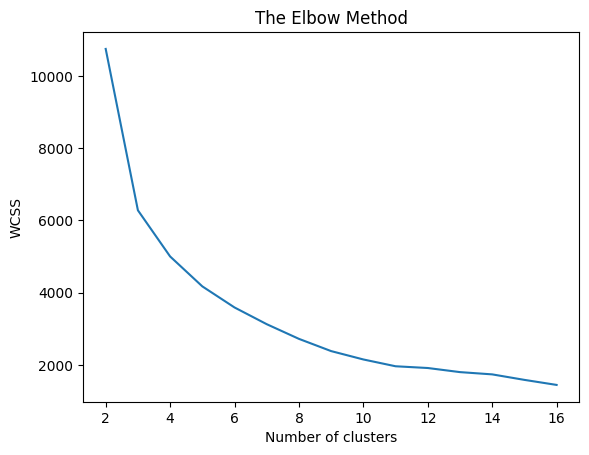

In [60]:
plt.plot(range(2, 17), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [61]:
wcss

[10743.568790519454,
 6280.80529093315,
 5004.2888367592195,
 4177.058770441913,
 3593.919363335198,
 3131.313802159807,
 2725.476160624088,
 2387.2941238007115,
 2155.955741298876,
 1967.8805166716977,
 1919.6064554004665,
 1806.1659753252288,
 1743.534525969021,
 1591.493899634815,
 1451.9653111804366]

In [62]:
scores_df = pd.DataFrame({'Number of Clusters': range(2, 17), 'Silhouette Score': score})
display(scores_df)

Number of Clusters  Silhouette Score
0                    2          0.526502
1                    3          0.509971
2                    4          0.456106
3                    5          0.452087
4                    6          0.359522
5                    7          0.362580
6                    8          0.352106
7                    9          0.361820
8                   10          0.361286
9                   11          0.350501
10                  12          0.335650
11                  13          0.331436
12                  14          0.329181
13                  15          0.339502
14                  16          0.347449

In [63]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(values)

KMeans(n_clusters=3, random_state=42)

In [64]:
from sklearn.metrics import silhouette_score
silhouette_score(values, kmeans.labels_)

np.float64(0.5099712286162609)

In [65]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(values, kmeans.labels_)

np.float64(3286.70283948757)

In [66]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(values, kmeans.labels_)

np.float64(0.7483855734216817)

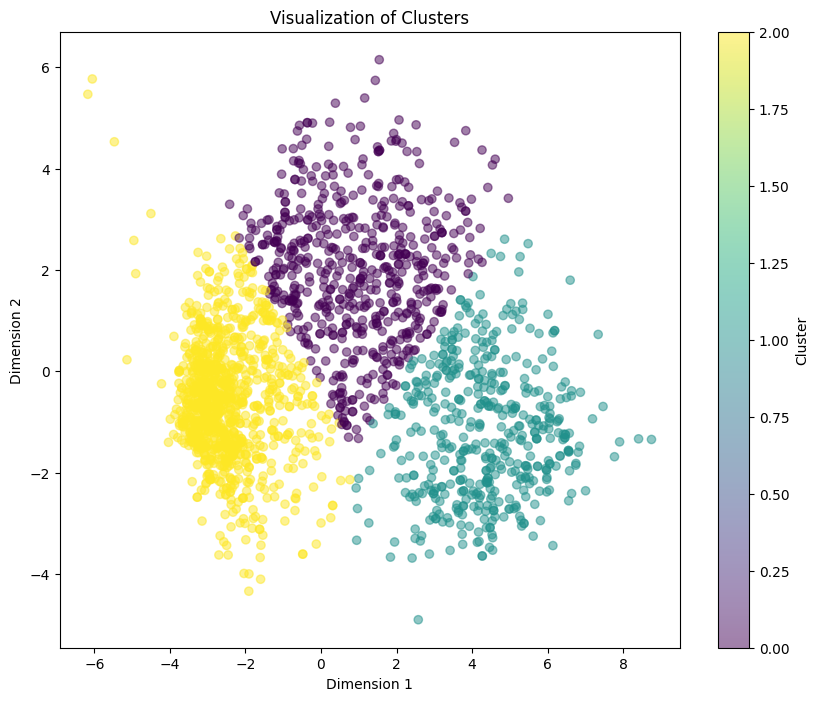

In [67]:
plt.figure(figsize=(10, 8))
plt.scatter(values[:, 0], values[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.title('Visualization of Clusters')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Cluster')
plt.show()

In [68]:
val = PCA(n_components=3)
val = val.fit_transform(df)
val

array([[ 4.82258577,  1.10133434, -0.30718365],
       [-2.58067184, -1.1614938 , -0.3690096 ],
       [ 2.52204945, -0.20203844, -0.78652253],
       ...,
       [ 2.78711075, -0.07922709,  2.45905849],
       [ 2.49255202,  0.42344948, -1.48881225],
       [-2.00699346,  0.96764081,  0.30999228]])

In [69]:
model = KMeans(n_clusters=3, init='k-means++', random_state=42)
model.fit(val)

KMeans(n_clusters=3, random_state=42)

In [70]:
import plotly.express as px

fig = px.scatter_3d(x=val[:, 0], y=val[:, 1], z=val[:, 2],
                  color=kmeans.labels_.astype(str), title='KMeans 3D Visualization')
fig.show()

In [71]:
# from sklearn.manifold import TSNE
# tsne = TSNE(n_components=3, perplexity=50.0)
# t_values = tsne.fit_transform(df)
# t_values

In [72]:
# !pip install bioinfokit --quiet

In [73]:
# from bioinfokit.visuz import cluster
# color_class = df2['Education']
# cluster.tsneplot(score=t_values, colorlist=color_class ,show=True)

In [74]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# values = pca.fit_transform(df)
# values

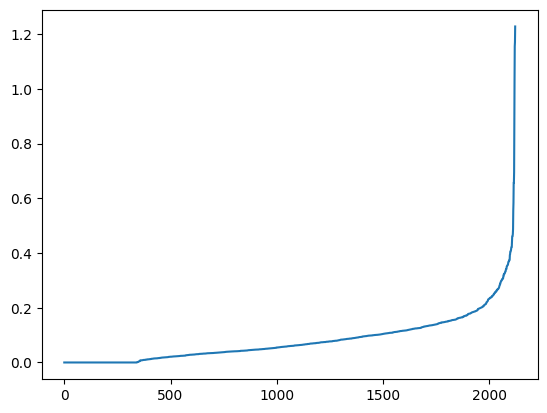

In [75]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=6)
nbrs = neigh.fit(values)
distances, indices = nbrs.kneighbors(values)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)

In [76]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.47, min_samples=47)
dbscan.fit(values)
db_score = silhouette_score(values, dbscan.labels_)
db_score

np.float64(0.379838862404108)

In [77]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(values, dbscan.labels_)

np.float64(1497.1890087770068)

In [78]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(values, dbscan.labels_)

np.float64(0.8399614684736704)

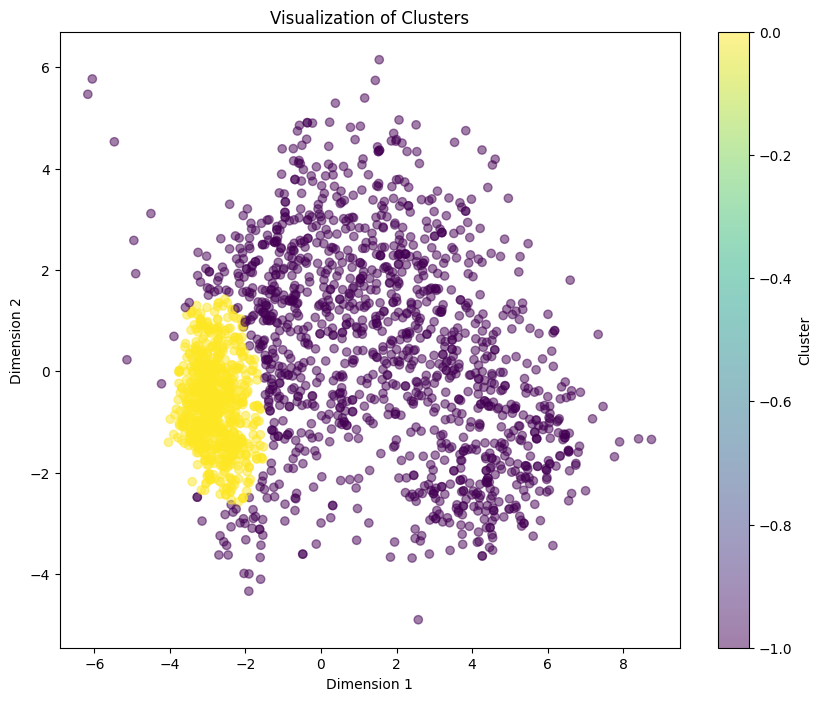

In [79]:
plt.figure(figsize=(10, 8))
plt.scatter(values[:, 0], values[:, 1], c=dbscan.labels_, cmap='viridis', alpha=0.5)
plt.title('Visualization of Clusters')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Cluster')
plt.show()

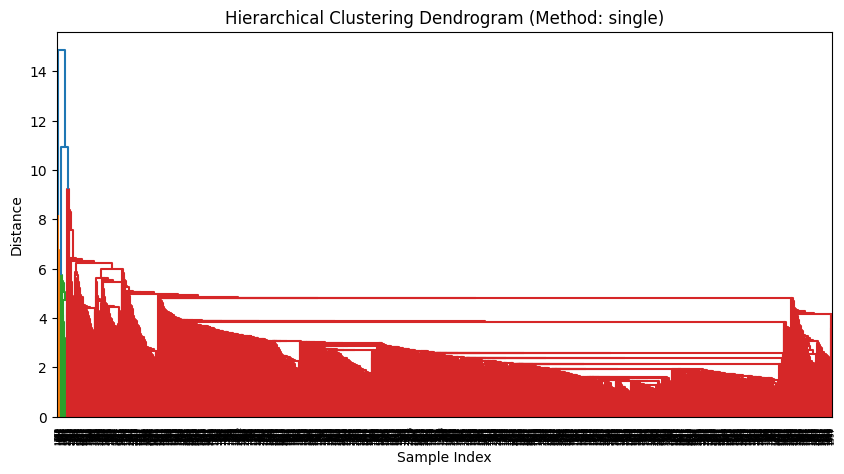

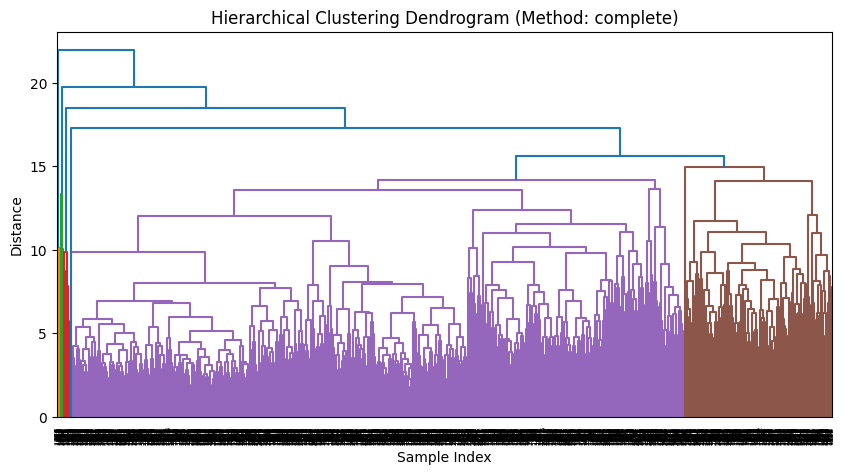

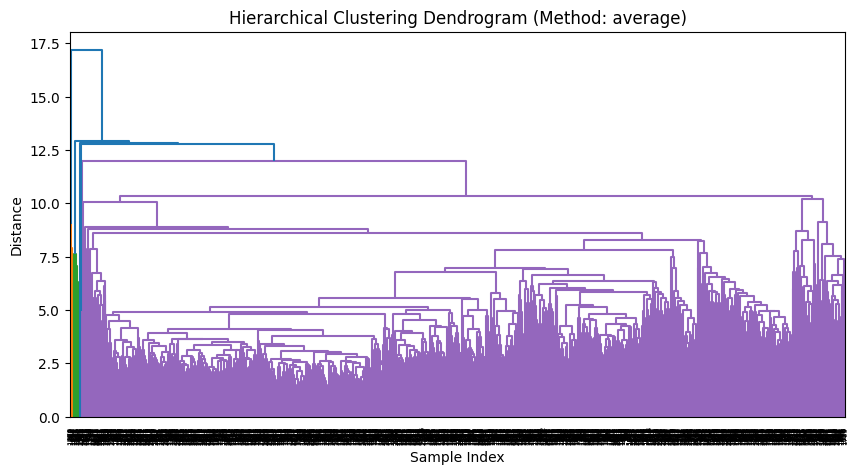

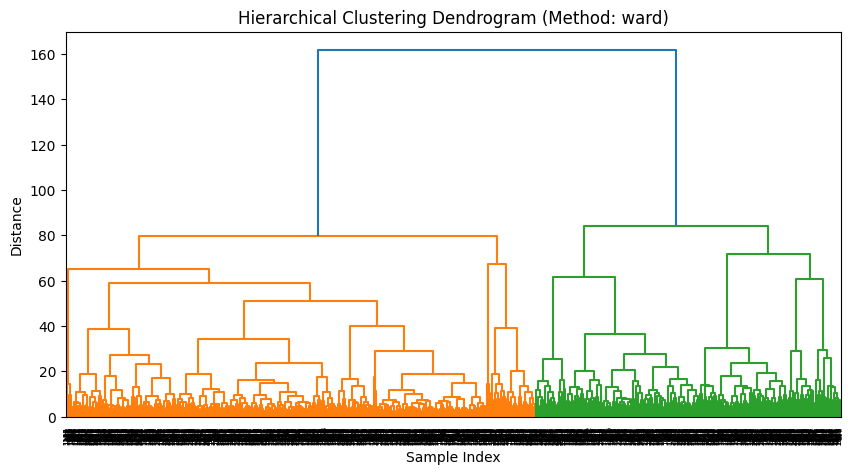

In [80]:
import scipy.cluster.hierarchy as hc
from scipy.cluster.hierarchy import linkage

linkage_methods = ['single', 'complete', 'average', 'ward']

# Select only numeric columns and convert to float64
df_numeric = df.select_dtypes(include=np.number).astype('float64')

for method in linkage_methods:
    # Fit hierarchical clustering model
    hc_model = linkage(df_numeric, method=method, metric='euclidean')

    # Plot dendrogram
    plt.figure(figsize=(10, 5))
    hc.dendrogram(hc_model)
    plt.title(f'Hierarchical Clustering Dendrogram (Method: {method})')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

In [81]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
hc.fit(values)

AgglomerativeClustering(n_clusters=3)

In [82]:
print(silhouette_score(values, hc.labels_))

0.4290400556551801


In [83]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(values, hc.labels_)

np.float64(2588.392623743573)

In [84]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(values, hc.labels_)

np.float64(0.8306521604065796)

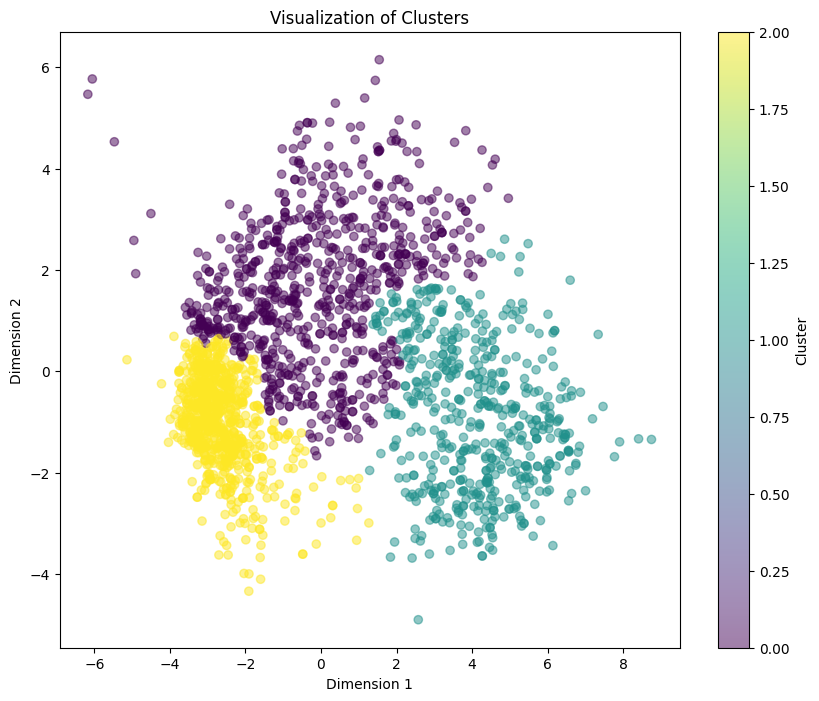

In [85]:
plt.figure(figsize=(10, 8))
plt.scatter(values[:, 0], values[:, 1], c=hc.labels_, cmap='viridis', alpha=0.5)
plt.title('Visualization of Clusters')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Cluster')
plt.show()

In [86]:
import joblib
joblib.dump(kmeans, "kmeans_model.pkl")
joblib.dump(hc, "hc.pkl")
joblib.dump(dbscan, "dbscan_model.pkl")
joblib.dump(pca, "pca_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("All models saved successfully.")


All models saved successfully.


In [87]:
import joblib

# Load pre-trained models
kmeans = joblib.load("/content/kmeans_model.pkl")
hc = joblib.load("/content/hc.pkl")
dbscan = joblib.load("/content/dbscan_model.pkl")
pca = joblib.load("/content/pca_model.pkl")
scaler = joblib.load("/content/scaler.pkl")

In [88]:
# app_code = '''
# import streamlit as st
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import joblib
# from sklearn.metrics import silhouette_score
# import plotly.express as px
# import scipy.cluster.hierarchy as hc
# from scipy.cluster.hierarchy import linkage
# from sklearn.preprocessing import StandardScaler


# st.title("Customer Segmentation & Marketing Campaign Analysis")

# # Load pre-trained models
# kmeans = joblib.load("/content/kmeans_model.pkl")
# hc_model = joblib.load("/content/hc.pkl") # Renamed to avoid conflict
# dbscan = joblib.load("/content/dbscan_model.pkl")
# pca = joblib.load("/content/pca_model.pkl")
# scaler = joblib.load("/content/scaler.pkl")


# # Upload Excel file
# uploaded_file = st.file_uploader("Upload marketing_campaign.xlsx", type=["xlsx"])

# if uploaded_file is not None:
#     df = pd.read_excel(uploaded_file, sheet_name='marketing_campaign')
#     st.subheader("Uploaded Data Preview")
#     st.dataframe(df.head())

#     num_col = df.select_dtypes(include=['int64', 'float64']).columns

#     from sklearn.ensemble import IsolationForest
#     iso = IsolationForest(random_state=42, contamination=0.05)
#     outliers = iso.fit_predict(df[num_col])
#     df = df[outliers == 1]

#     # Fill missing Income
#     df['Income'].fillna(df['Income'].median(), inplace=True)

#     # IQR-based outlier removal for Income
#     q1 = df['Income'].quantile(0.25)
#     q3 = df['Income'].quantile(0.75)
#     iqr = q3 - q1
#     lower_bound = q1 - 1.5 * iqr
#     upper_bound = q3 + 1.5 * iqr
#     df = df[(df['Income'] >= lower_bound) & (df['Income'] <= upper_bound)]

#     # Feature Engineering
#     df['Total_Spend'] = df[['MntWines', 'MntFruits', 'MntMeatProducts',
#                             'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
#     df['Campaign_Accepted_Total'] = df[[f'AcceptedCmp{i}' for i in range(1,6)]].sum(axis=1)
#     df['Engagement_Score'] = df[['NumWebVisitsMonth', 'NumCatalogPurchases',
#                                  'NumStorePurchases', 'NumWebPurchases']].sum(axis=1)
#     df['Is_Parent'] = (df['Kidhome'] + df['Teenhome'] > 0).astype(int)
#     df['avg_web_visits'] = df['NumWebVisitsMonth'] / 12
#     df['online_purchase_ratio'] = df['NumWebPurchases'] / (df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'])
#     df['online_purchase_ratio'].fillna(df['online_purchase_ratio'].median(), inplace=True)


#     # Drop unused columns
#     df.drop(columns=['Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'ID'], inplace=True)


#     df2 = df.copy()
#     # Store columns before encoding for prediction
#     columns_before_encoding = df.columns.tolist()

#     # Encode categorical features
#     df = pd.get_dummies(df, columns=['Education', 'Marital_Status'])
#     for col in df.select_dtypes(include='bool').columns:
#         df[col] = df[col].astype(int)

#     # Scale numerical columns
#     num_col = ['Income', 'Year_Birth', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
#                'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
#                'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
#                'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
#                'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response',
#                'Total_Spend', 'Campaign_Accepted_Total', 'Engagement_Score',
#                'Is_Parent', 'avg_web_visits', 'online_purchase_ratio']

#     original_spending = df2[["MntWines", "MntFruits", "MntMeatProducts",
#                         "MntFishProducts", "MntSweetProducts", "MntGoldProds"]].copy()

#     df[num_col] = scaler.fit_transform(df[num_col])

#     # PCA transform
#     values = pca.transform(df)
#     feature_columns = df.columns.tolist()

#     # Predict clusters
#     df['KMeans_Cluster'] = kmeans.predict(values)
#     df['Agglo_Cluster'] = hc_model.fit_predict(values) # Used hc_model
#     df['DBSCAN_Cluster'] = dbscan.fit_predict(values)

#     # Silhouette Scores
#     kmeans_silhouette = silhouette_score(values, df['KMeans_Cluster'])
#     agglo_silhouette = silhouette_score(values, df['Agglo_Cluster'])
#     dbscan_silhouette = silhouette_score(values, df['DBSCAN_Cluster']) if len(set(df['DBSCAN_Cluster'])) > 1 else -1

#     # Cluster visualization
#     st.subheader("KMeans Clustering")
#     fig = px.scatter(x=values[:, 0], y=values[:, 1], color=df['KMeans_Cluster'].astype(str), title="KMeans Clusters")
#     st.plotly_chart(fig)

#     st.subheader("Agglomerative Clustering")
#     fig = px.scatter(x=values[:, 0], y=values[:, 1], color=df['Agglo_Cluster'].astype(str), title="Agglomerative Clusters")
#     st.plotly_chart(fig)

#     st.subheader("DBSCAN Clustering")
#     fig = px.scatter(x=values[:, 0], y=values[:, 1], color=df['DBSCAN_Cluster'].astype(str), title="DBSCAN Clusters")
#     st.plotly_chart(fig)

#     # Add Dendrogram
#     st.subheader("Hierarchical Clustering Dendrogram (Method: Ward)")
#     df_numeric = df.select_dtypes(include=np.number).astype('float64')
#     hc_plot_model = linkage(df_numeric, method='ward', metric='euclidean')
#     fig, ax = plt.subplots(figsize=(10, 5))
#     hc.dendrogram(hc_plot_model, ax=ax)
#     plt.title('Hierarchical Clustering Dendrogram (Method: Ward)')
#     plt.xlabel('Sample Index')
#     plt.ylabel('Distance')
#     st.pyplot(fig)


#     st.subheader("Silhouette Scores")
#     score_df = pd.DataFrame({
#         "Clustering Method": ["KMeans", "Agglomerative", "DBSCAN"],
#         "Silhouette Score": [kmeans_silhouette, agglo_silhouette, dbscan_silhouette]
#     })
#     st.dataframe(score_df)
#     st.bar_chart(score_df.set_index("Clustering Method"))

#    # Income Distribution
#     st.subheader("Income Distribution Across Customers")
#     st.write("This bar chart shows the income distribution of customers, grouped into different income ranges. It helps identify the most common income levels in the dataset.")

#     fig, ax = plt.subplots()
#     sns.histplot(df["Income"], bins=20, kde=True, ax=ax)
#     st.pyplot(fig)

#     df['KMeans_Cluster'] = kmeans.predict(values)
#     df['Agglo_Cluster'] = hc_model.fit_predict(values) # Used hc_model
#     df['DBSCAN_Cluster'] = dbscan.fit_predict(values)
#     df['cluster'] = df['KMeans_Cluster']


#     # Bar Chart
#     st.subheader("Customer Segmentation Count")
#     st.write("This bar chart shows the number of customers in each segment after applying K-Means clustering.")

#     if "cluster" not in df.columns:
#         st.error("Error: 'cluster' column is missing. Please ensure clustering has been performed.")
#     else:
#         cluster_counts = df["cluster"].value_counts().reset_index()
#         cluster_counts.columns = ["Cluster", "Count"]
#         fig = px.bar(cluster_counts, x="Cluster", y="Count", title="Customer Segmentation Count", color="Cluster")
#         st.plotly_chart(fig)

#     # Pie chart with data labels
#     st.subheader("Customer Segmentation Proportion")
#     st.write("This pie chart represents the proportion of customers in each cluster. It helps in understanding the distribution of different customer groups.")

#     fig = px.pie(df, names="cluster", title="Customer Segments",
#                  hole=0.3,
#                  color_discrete_sequence=px.colors.qualitative.Set2,
#                  labels={"cluster": "Customer Segment"},
#                  template="plotly_white")

#     fig.update_traces(textinfo='percent+label', textfont_size=14)
#     st.plotly_chart(fig)

#     # Spending Distribution by Product category
#     st.subheader("Spending Distribution by Product Category")

#     spending_columns = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
#     df_spending = df[spending_columns].sum().reset_index()
#     df_spending.columns = ["Product Category", "Total Spending"]

#     df_spending = original_spending.sum().reset_index()
#     df_spending.columns = ["Product Category", "Total Spending"]

#     fig = px.bar(df_spending, x="Product Category", y="Total Spending",
#                 title="Total Spending by Product Category",
#                 color="Product Category")

#     # Widen the whole chart and reduce bar spacing
#     fig.update_layout(
#         width=1800,         # Increased width
#         height=600,        # Kept height the same
#         bargap=0.05,       # kept bar gap the same
#         bargroupgap=0.0,    # kept bar group gap the same
#     )


#     st.plotly_chart(fig, use_container_width=True)

#     st.subheader("📄 Cluster Narratives (Auto-Generated)")

#     cluster_dist = df["KMeans_Cluster"].value_counts(normalize=True).sort_index()
#     summary = df2.copy()
#     summary['KMeans_Cluster'] = df['KMeans_Cluster']

#     cluster_insights = summary.groupby("KMeans_Cluster").agg({
#         "Year_Birth": "mean",
#         "Income": "mean",
#         "Marital_Status": lambda x: x.mode().iloc[0],
#         "Education": lambda x: x.mode().iloc[0],
#         "MntWines": "mean",
#         "MntMeatProducts": "mean"
#     }).reset_index()

#     for i, row in cluster_insights.iterrows():
#         cluster_id = int(row['KMeans_Cluster'])
#         pct = round(cluster_dist[cluster_id] * 100, 1)

#         st.markdown(f"""
#     ### 🧩 Cluster {cluster_id}
#     - **Customer Share:** {pct}% of total customers
#     - **Marital Status:** Mostly *{row['Marital_Status'].title()}*
#     - **Education Level:** Mostly *{row['Education'].title()}*
#     - **Average Year_Birth:** {int(row["Year_Birth"])} years
#     - **Average Income:** ${int(row['Income']):,}
#     - **Wine Spending:** ${int(row['MntWines'])}
#     - **Meat Spending:** ${int(row['MntMeatProducts'])}
#     ---
#     """)

#     # Add prediction sidebar
#     st.sidebar.subheader("Predict Customer Cluster")

#     # Dropdowns from unique values in dataset
#     marital_options = df2["Marital_Status"].unique().tolist()
#     education_options = df2["Education"].unique().tolist()

#     # Prediction inputs
#     user_year_birth = st.sidebar.slider(
#         "Year of Birth",
#         int(df2["Year_Birth"].min()),
#         int(df2["Year_Birth"].max()),
#         int(df2["Year_Birth"].mean())
#     )

#     user_income = st.sidebar.slider(
#         "Income",
#         float(df2['Income'].min()),
#         float(df2['Income'].max()),
#         float(df2['Income'].mean())
#     )

#     user_marital_status = st.sidebar.selectbox("Marital Status", marital_options)
#     user_education = st.sidebar.selectbox("Education Level", education_options)

#     user_mnt_wines = st.sidebar.slider(
#         "Wine Spending (MntWines)",
#         float(df2['MntWines'].min()),
#         float(df2['MntWines'].max()),
#         float(df2['MntWines'].mean())
#     )

#     user_mnt_meat = st.sidebar.slider(
#         "Meat Spending (MntMeatProducts)",
#         float(df2['MntMeatProducts'].min()),
#         float(df2['MntMeatProducts'].max()),
#         float(df2['MntMeatProducts'].mean())
#     )

#     if st.sidebar.button("Predict Cluster"):
#         # Create input dataframe with all features
#         user_data = pd.DataFrame(np.zeros((1, len(feature_columns))), columns=feature_columns)

#         # Fill numeric fields
#         user_data['Year_Birth'] = user_year_birth
#         user_data['Income'] = user_income
#         user_data['MntWines'] = user_mnt_wines
#         user_data['MntMeatProducts'] = user_mnt_meat

#         # Fill categorical one-hot fields for Marital Status and Education
#         for col in user_data.columns:
#             if col.startswith("Marital_Status_") and col == f"Marital_Status_{user_marital_status}":
#                 user_data[col] = 1
#             if col.startswith("Education_") and col == f"Education_{user_education}":
#                 user_data[col] = 1

#         # Fill remaining numeric features with mean values from df2
#         for col in user_data.columns:
#             if col not in ['Year_Birth', 'Income', 'MntWines', 'MntMeatProducts'] \
#               and not col.startswith("Marital_Status_") and not col.startswith("Education_"):
#                 if col in df2.columns and df2[col].dtype in ['int64', 'float64']:
#                     user_data[col] = df2[col].mean()

#         # Ensure numeric format
#         user_data = user_data.apply(pd.to_numeric, errors='coerce').fillna(0)

#         # Scale and transform
#         user_data[num_col] = scaler.transform(user_data[num_col])
#         user_values = pca.transform(user_data)

#         # Predict cluster
#         predicted_cluster = kmeans.predict(user_values)[0]
#         st.sidebar.success(f"Predicted Cluster (KMeans): {predicted_cluster}")


# '''
# with open("app.py", "w") as f:
#     f.write(app_code)

# print("app.py updated.")

In [89]:
app_code = '''
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import silhouette_score
import plotly.express as px
import scipy.cluster.hierarchy as hc
from scipy.cluster.hierarchy import linkage
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

st.title("Customer Segmentation & Marketing Campaign Analysis (with SVM Predictor)")

# Load pre-trained models
kmeans = joblib.load("/content/kmeans_model.pkl")
hc_model = joblib.load("/content/hc.pkl")
dbscan = joblib.load("/content/dbscan_model.pkl")
pca = joblib.load("/content/pca_model.pkl")
scaler = joblib.load("/content/scaler.pkl")

# Upload Excel file
uploaded_file = st.file_uploader("Upload marketing_campaign.xlsx", type=["xlsx"])

if uploaded_file is not None:
    df = pd.read_excel(uploaded_file, sheet_name='marketing_campaign')
    st.subheader("Uploaded Data Preview")
    st.dataframe(df.head())

    num_col = df.select_dtypes(include=['int64', 'float64']).columns

    # Handle outliers with IsolationForest
    from sklearn.ensemble import IsolationForest
    iso = IsolationForest(random_state=42, contamination=0.05)
    outliers = iso.fit_predict(df[num_col])
    df = df[outliers == 1]

    # Fill missing Income
    df['Income'].fillna(df['Income'].median(), inplace=True)

    # IQR-based outlier removal for Income
    q1 = df['Income'].quantile(0.25)
    q3 = df['Income'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df['Income'] >= lower_bound) & (df['Income'] <= upper_bound)]

    # Feature Engineering
    df['Total_Spend'] = df[['MntWines', 'MntFruits', 'MntMeatProducts',
                            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
    df['Campaign_Accepted_Total'] = df[[f'AcceptedCmp{i}' for i in range(1,6)]].sum(axis=1)
    df['Engagement_Score'] = df[['NumWebVisitsMonth', 'NumCatalogPurchases',
                                 'NumStorePurchases', 'NumWebPurchases']].sum(axis=1)
    df['Is_Parent'] = (df['Kidhome'] + df['Teenhome'] > 0).astype(int)
    df['avg_web_visits'] = df['NumWebVisitsMonth'] / 12
    df['online_purchase_ratio'] = df['NumWebPurchases'] / (df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'])
    df['online_purchase_ratio'].fillna(df['online_purchase_ratio'].median(), inplace=True)

    # Drop unused columns
    df.drop(columns=['Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'ID'], inplace=True)

    df2 = df.copy()
    columns_before_encoding = df.columns.tolist()

    # Encode categorical features
    df = pd.get_dummies(df, columns=['Education', 'Marital_Status'])
    for col in df.select_dtypes(include='bool').columns:
        df[col] = df[col].astype(int)

    # Scale numerical columns
    num_col = ['Income', 'Year_Birth', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
               'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
               'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
               'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
               'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response',
               'Total_Spend', 'Campaign_Accepted_Total', 'Engagement_Score',
               'Is_Parent', 'avg_web_visits', 'online_purchase_ratio']

    original_spending = df2[["MntWines", "MntFruits", "MntMeatProducts",
                        "MntFishProducts", "MntSweetProducts", "MntGoldProds"]].copy()

    df[num_col] = scaler.transform(df[num_col])

    # PCA transform
    values = pca.transform(df)
    feature_columns = df.columns.tolist()

    # Predict clusters
    df['KMeans_Cluster'] = kmeans.predict(values)
    df['Agglo_Cluster'] = hc_model.fit_predict(values)
    df['DBSCAN_Cluster'] = dbscan.fit_predict(values)

    # Train SVM model to predict KMeans clusters
    svm_model = SVC(kernel="rbf", probability=True, random_state=42)
    svm_model.fit(values, df['KMeans_Cluster'])

    # Silhouette Scores
    kmeans_silhouette = silhouette_score(values, df['KMeans_Cluster'])
    agglo_silhouette = silhouette_score(values, df['Agglo_Cluster'])
    dbscan_silhouette = silhouette_score(values, df['DBSCAN_Cluster']) if len(set(df['DBSCAN_Cluster'])) > 1 else -1

    # Cluster visualization
    st.subheader("KMeans Clustering")
    fig = px.scatter(x=values[:, 0], y=values[:, 1], color=df['KMeans_Cluster'].astype(str), title="KMeans Clusters")
    st.plotly_chart(fig)

    st.subheader("Agglomerative Clustering")
    fig = px.scatter(x=values[:, 0], y=values[:, 1], color=df['Agglo_Cluster'].astype(str), title="Agglomerative Clusters")
    st.plotly_chart(fig)

    st.subheader("DBSCAN Clustering")
    fig = px.scatter(x=values[:, 0], y=values[:, 1], color=df['DBSCAN_Cluster'].astype(str), title="DBSCAN Clusters")
    st.plotly_chart(fig)

    # Dendrogram
    st.subheader("Hierarchical Clustering Dendrogram (Method: Ward)")
    df_numeric = df.select_dtypes(include=np.number).astype('float64')
    hc_plot_model = linkage(df_numeric, method='ward', metric='euclidean')
    fig, ax = plt.subplots(figsize=(10, 5))
    hc.dendrogram(hc_plot_model, ax=ax)
    plt.title('Hierarchical Clustering Dendrogram (Method: Ward)')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    st.pyplot(fig)

    # Silhouette Scores Table
    st.subheader("Silhouette Scores")
    score_df = pd.DataFrame({
        "Clustering Method": ["KMeans", "Agglomerative", "DBSCAN"],
        "Silhouette Score": [kmeans_silhouette, agglo_silhouette, dbscan_silhouette]
    })
    st.dataframe(score_df)
    st.bar_chart(score_df.set_index("Clustering Method"))

    # Income Distribution
    st.subheader("Income Distribution Across Customers")
    fig, ax = plt.subplots()
    sns.histplot(df["Income"], bins=20, kde=True, ax=ax)
    st.pyplot(fig)

    # Customer Segmentation Count
    st.subheader("Customer Segmentation Count")
    cluster_counts = df["KMeans_Cluster"].value_counts().reset_index()
    cluster_counts.columns = ["Cluster", "Count"]
    fig = px.bar(cluster_counts, x="Cluster", y="Count", title="Customer Segmentation Count", color="Cluster")
    st.plotly_chart(fig)

    # Customer Segmentation Proportion
    st.subheader("Customer Segmentation Proportion")
    fig = px.pie(df, names="KMeans_Cluster", title="Customer Segments",
                 hole=0.3,
                 color_discrete_sequence=px.colors.qualitative.Set2,
                 labels={"cluster": "Customer Segment"},
                 template="plotly_white")
    fig.update_traces(textinfo='percent+label', textfont_size=14)
    st.plotly_chart(fig)

    # Spending Distribution
    st.subheader("Spending Distribution by Product Category")
    df_spending = original_spending.sum().reset_index()
    df_spending.columns = ["Product Category", "Total Spending"]
    fig = px.bar(df_spending, x="Product Category", y="Total Spending",
                title="Total Spending by Product Category",
                color="Product Category")
    fig.update_layout(width=1800, height=600, bargap=0.05, bargroupgap=0.0)
    st.plotly_chart(fig, use_container_width=True)

    # Cluster Narratives
    st.subheader("📄 Cluster Narratives (Auto-Generated)")
    cluster_dist = df["KMeans_Cluster"].value_counts(normalize=True).sort_index()
    summary = df2.copy()
    summary['KMeans_Cluster'] = df['KMeans_Cluster']

    cluster_insights = summary.groupby("KMeans_Cluster").agg({
        "Year_Birth": "mean",
        "Income": "mean",
        "Marital_Status": lambda x: x.mode().iloc[0],
        "Education": lambda x: x.mode().iloc[0],
        "MntWines": "mean",
        "MntMeatProducts": "mean"
    }).reset_index()

    for i, row in cluster_insights.iterrows():
        cluster_id = int(row['KMeans_Cluster'])
        pct = round(cluster_dist[cluster_id] * 100, 1)
        st.markdown(f"""
        ### 🧩 Cluster {cluster_id}
        - **Customer Share:** {pct}% of total customers
        - **Marital Status:** Mostly *{row['Marital_Status'].title()}*
        - **Education Level:** Mostly *{row['Education'].title()}*
        - **Average Year_Birth:** {int(row["Year_Birth"])} years
        - **Average Income:** ${int(row['Income']):,}
        - **Wine Spending:** ${int(row['MntWines'])}
        - **Meat Spending:** ${int(row['MntMeatProducts'])}
        ---
        """)

    # Sidebar Prediction with SVM
    st.sidebar.subheader("Predict Customer Cluster (SVM)")
    marital_options = df2["Marital_Status"].unique().tolist()
    education_options = df2["Education"].unique().tolist()

    user_year_birth = st.sidebar.slider("Year of Birth", int(df2["Year_Birth"].min()), int(df2["Year_Birth"].max()), int(df2["Year_Birth"].mean()))
    user_income = st.sidebar.slider("Income", float(df2['Income'].min()), float(df2['Income'].max()), float(df2['Income'].mean()))
    user_marital_status = st.sidebar.selectbox("Marital Status", marital_options)
    user_education = st.sidebar.selectbox("Education Level", education_options)
    user_mnt_wines = st.sidebar.slider("Wine Spending (MntWines)", float(df2['MntWines'].min()), float(df2['MntWines'].max()), float(df2['MntWines'].mean()))
    user_mnt_meat = st.sidebar.slider("Meat Spending (MntMeatProducts)", float(df2['MntMeatProducts'].min()), float(df2['MntMeatProducts'].max()), float(df2['MntMeatProducts'].mean()))

    if st.sidebar.button("Predict Cluster"):
        user_data = pd.DataFrame(np.zeros((1, len(feature_columns))), columns=feature_columns)
        user_data['Year_Birth'] = user_year_birth
        user_data['Income'] = user_income
        user_data['MntWines'] = user_mnt_wines
        user_data['MntMeatProducts'] = user_mnt_meat

        for col in user_data.columns:
            if col.startswith("Marital_Status_") and col == f"Marital_Status_{user_marital_status}":
                user_data[col] = 1
            if col.startswith("Education_") and col == f"Education_{user_education}":
                user_data[col] = 1

        for col in user_data.columns:
            if col not in ['Year_Birth', 'Income', 'MntWines', 'MntMeatProducts'] \
              and not col.startswith("Marital_Status_") and not col.startswith("Education_"):
                if col in df2.columns and df2[col].dtype in ['int64', 'float64']:
                    user_data[col] = df2[col].mean()

        user_data = user_data.apply(pd.to_numeric, errors='coerce').fillna(0)

        user_data[num_col] = scaler.transform(user_data[num_col])
        user_values = pca.transform(user_data)

        predicted_cluster = svm_model.predict(user_values)[0]
        proba = svm_model.predict_proba(user_values)[0]
        confidence = round(max(proba)*100, 2)

        st.sidebar.success(f"Predicted Cluster (SVM): {predicted_cluster} with {confidence}% confidence")

'''
with open("app.py", "w") as f:
    f.write(app_code)

print("app.py updated.")

app.py updated.


In [90]:
df.head(2)

Year_Birth    Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0   -0.981582  0.403836 -0.849810 -0.959525  0.308375  1.153446   1.693315   
1   -1.233880 -0.194398  0.998701  0.882312 -0.384519 -0.859705  -0.620233   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  Education_Master  \
0         1.949591         2.629722          1.657950  ...                 0   
1        -0.708765        -0.628474         -0.619798  ...                 0   

   Education_PhD  Marital_Status_Absurd  Marital_Status_Alone  \
0              0                      0                     0   
1              0                      0                     0   

   Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  \
0                        0                       0                      1   
1                        0                       0                      1   

   Marital_Status_Together  Marital_Status_Widow  Marital_Status_YOLO  
0                        0                     0                    0  
1                        0                     0                    0  

[2 rows x 42 columns]

In [91]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from sklearn.ensemble import IsolationForest

# =============================
# Load your dataset
# =============================
X = pd.read_excel("/content/drive/MyDrive/Data Science/Projects/P566 Customer Segmentation/marketing_campaign.xlsx")

# =============================
# Preprocessing steps (similar to what was done for df)
# =============================

# Handle missing Income
X['Income'].fillna(X['Income'].median(), inplace=True)

# Handle outliers with IsolationForest
num_col_X = X.select_dtypes(include=['int64', 'float64']).columns
iso = IsolationForest(random_state=42, contamination=0.05)
outliers = iso.fit_predict(X[num_col_X])
X = X[outliers == 1]

# IQR-based outlier removal for Income
q1_X = X['Income'].quantile(0.25)
q3_X = X['Income'].quantile(0.75)
iqr_X = q3_X - q1_X
lower_bound_X = q1_X - 1.5 * iqr_X
upper_bound_X = q3_X + 1.5 * iqr_X
X = X[(X['Income'] >= lower_bound_X) & (X['Income'] <= upper_bound_X)]


# Feature Engineering
X['Total_Spend'] = X[['MntWines', 'MntFruits', 'MntMeatProducts',
                            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
X['Campaign_Accepted_Total'] = X[[f'AcceptedCmp{i}' for i in range(1,6)]].sum(axis=1)
X['Engagement_Score'] = X[['NumWebVisitsMonth', 'NumCatalogPurchases',
                                 'NumStorePurchases', 'NumWebPurchases']].sum(axis=1)
X['Is_Parent'] = (X['Kidhome'] + X['Teenhome'] > 0).astype(int)
X['avg_web_visits'] = X['NumWebVisitsMonth'] / 12
X['online_purchase_ratio'] = X['NumWebPurchases'] / (X['NumWebPurchases'] + X['NumCatalogPurchases'] + X['NumStorePurchases'])
X['online_purchase_ratio'].fillna(X['online_purchase_ratio'].median(), inplace=True)

# Drop unused columns
X.drop(columns=['Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'ID'], inplace=True)


# Encode categorical features
X = pd.get_dummies(X, columns=['Education', 'Marital_Status'])
for col in X.select_dtypes(include='bool').columns:
    X[col] = X[col].astype(int)

# Scale numerical columns
num_col_scaled = ['Income', 'Year_Birth', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
               'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
               'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
               'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
               'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response',
               'Total_Spend', 'Campaign_Accepted_Total', 'Engagement_Score',
               'Is_Parent', 'avg_web_visits', 'online_purchase_ratio']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[num_col_scaled])
X_pca = X_scaled
# Apply PCA (using the previously fitted PCA from the notebook)
# Assuming pca was fitted on df earlier
# If not, you might need to fit PCA here:
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_scaled)
# # Using the existing pca object from the notebook
# X_pca = pca.transform(X_scaled)


# =============================
# Step 1: KMeans clustering
# =============================
kmeans = KMeans(n_clusters=3, random_state=42)  # change cluster number if needed
cluster_labels = kmeans.fit_predict(X_pca)

# =============================
# Step 2: Train SVM on KMeans labels
# =============================
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, cluster_labels, test_size=0.2, random_state=42, stratify=cluster_labels
)

svm_model = SVC(kernel="rbf", probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# =============================
# Step 3: Evaluate
# =============================
y_pred = svm_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

/tmp/ipython-input-1871733904.py:21: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-1871733904.py:47: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or

SVM Accuracy: 0.9882352941176471

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       245
           1       0.98      1.00      0.99        42
           2       0.99      0.98      0.99       138

    accuracy                           0.99       425
   macro avg       0.99      0.99      0.99       425
weighted avg       0.99      0.99      0.99       425



In [92]:
X['Cluster'] = cluster_labels
cluster1_data = X[X['Cluster'] == 1]
display(cluster1_data.head())

Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
15        1946  82800.0        0         0       23      1006         22   
18        1949  76995.0        0         1       91      1012         80   
22        1949  58607.0        0         1       63       867          0   
29        1965  84618.0        0         0       96       684        100   
55        1955  82384.0        0         0       55       984         51   

    MntMeatProducts  MntFishProducts  MntSweetProducts  ...  Education_PhD  \
15              115               59                68  ...              1   
18              498                0                16  ...              0   
22               86                0                 0  ...              1   
29              801               21                66  ...              1   
55              432              180               120  ...              0   

    Marital_Status_Absurd  Marital_Status_Alone  Marital_Status_Divorced  \
15                      0                     0                        0   
18                      0                     0                        0   
22                      0                     0                        0   
29                      0                     0                        0   
55                      0                     0                        0   

    Marital_Status_Married  Marital_Status_Single  Marital_Status_Together  \
15                       0                      1                        0   
18                       1                      0                        0   
22                       1                      0                        0   
29                       1                      0                        0   
55                       0                      0                        1   

    Marital_Status_Widow  Marital_Status_YOLO  Cluster  
15                     0                    0        1  
18                     0                    0        1  
22                     0                    0        1  
29                     0                    0        1  
55                     0                    0        1  

[5 rows x 43 columns]

In [93]:
X['Cluster'] = cluster_labels

# Filter Cluster 1 + Education_PhD
cluster1_phd = X[(X['Cluster'] == 1) & (X['Education_PhD'] == 1)]

display(cluster1_phd.head())

Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
15         1946  82800.0        0         0       23      1006         22   
22         1949  58607.0        0         1       63       867          0   
29         1965  84618.0        0         0       96       684        100   
73         1975  60631.0        1         1       88       565          6   
111        1991  68126.0        0         0       40      1332         17   

     MntMeatProducts  MntFishProducts  MntSweetProducts  ...  Education_PhD  \
15               115               59                68  ...              1   
22                86                0                 0  ...              1   
29               801               21                66  ...              1   
73                65                0                 6  ...              1   
111              311               23                51  ...              1   

     Marital_Status_Absurd  Marital_Status_Alone  Marital_Status_Divorced  \
15                       0                     0                        0   
22                       0                     0                        0   
29                       0                     0                        0   
73                       0                     0                        0   
111                      0                     0                        0   

     Marital_Status_Married  Marital_Status_Single  Marital_Status_Together  \
15                        0                      1                        0   
22                        1                      0                        0   
29                        1                      0                        0   
73                        1                      0                        0   
111                       0                      1                        0   

     Marital_Status_Widow  Marital_Status_YOLO  Cluster  
15                      0                    0        1  
22                      0                    0        1  
29                      0                    0        1  
73                      0                    0        1  
111                     0                    0        1  

[5 rows x 43 columns]

In [94]:
# !pip install streamlit --quiet

In [95]:
# !streamlit cache clear

In [96]:
# !streamlit run app.py & npx localtunnel --port 8501
# # # !streamlit run app.py --server.port 8502 & npx localtunnel --port 8502

In [97]:
# 1. Remove old ngrok & install latest
# !rm -rf /usr/local/bin/ngrok
# !wget -q -O ngrok.zip https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-linux-amd64.zip
# !unzip -o ngrok.zip -d /usr/local/bin/
# !ngrok version


In [98]:
# 2. Install pyngrok again (so it detects the new binary)
# !pip install --upgrade pyngrok streamlit -- quiet

In [102]:
# 3. Connect ngrok with your token
from pyngrok import ngrok
import subprocess

ngrok.set_auth_token("Connect ngrok with your token")

!pkill streamlit || echo "No process running"

process = subprocess.Popen(["streamlit", "run", "app.py", "--server.port", "8501"])

public_url = ngrok.connect(8501, proto="http")
print("Streamlit App URL:", public_url)

Streamlit App URL: NgrokTunnel: "https://60da9cca95c0.ngrok-free.app" -> "http://localhost:8501"


RUN THE BELOW COMMAND IF THE ABOVE CODE DOES NOT WORK AND THEN RUN THE ABOVE COMMAND AGAIN


In [103]:
# ngrok.disconnect(public_url.public_url)  # stop just this one
# # or
ngrok.kill()  # stop all tunnels
!pkill streamlit  # stop Streamlit too